In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import variation 
import statistics
import warnings
warnings.filterwarnings('ignore')

### The following data represents the price in dollars for branded shirts in a website NuCloth


In [2]:
prices = [23, 30, 20, 27, 44, 26, 35, 20, 29, 29, 25, 15, 18, 27, 19, 22, 12, 26, 34, 15, 27, 35, 26, 43, 35, 14, 24, 12, 23, 31, 40, 35, 38, 57, 22, 42, 24, 21, 27, 33]

### Q1. Compute the mean, median and the mode of the data

In [3]:
mean = np.mean(prices)
median = np.median(prices)
mode = statistics.mode(prices)
print('Mean of the dataset :',mean)
print('Median of the dataset :',median)
print('Mode of the dataset :',mode)

Mean of the dataset : 27.625
Median of the dataset : 26.5
Mode of the dataset : 27


### Q2. Compute the range , variance and standard deviation of the data 

In [4]:
rng = max(prices) - min(prices)
variance = statistics.variance(prices)
standard_deviation = np.std(prices)

print('Range of the dataset :',rng)
print('Variance of the dataset :',variance)
print('Standard_deviation of the dataset :',standard_deviation)


Range of the dataset : 45
Variance of the dataset : 92.59935897435898
Standard_deviation of the dataset : 9.501809038283184


### Q3.Find the mean deviation for the data . The mean deviation is defined as below

In [5]:
xbar = np.mean(prices)
x = prices
n = len(prices)
mean_deviation = sum(abs(x-xbar))/n
print('Mean_deviation of the dataset:',mean_deviation)

Mean_deviation of the dataset: 7.4


### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [6]:
skewness  = (3*(xbar-median))/standard_deviation
print('Pearson coefficient of skewness of the dataset:',skewness)

Pearson coefficient of skewness of the dataset: 0.3551955197586043


In [7]:
# the skewness value is 0.355 which means the distribution is sightly positively skewed

### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.


In [8]:
# range of two standard deviation of the mean
upper_rng = mean + (2*standard_deviation)
lower_rng = mean - (2*standard_deviation)

# counting the number of data values that fall within two standard deviations of the mean
count = 0
for i in prices:
    if i < upper_rng and i > lower_rng:
        count +=1
        
print('The number of data values that fall within two standard deviations of the mean:',count)

The number of data values that fall within two standard deviations of the mean: 39


In [9]:
#  Chebyshev’s Theorem
1-(1/(2**2))

0.75

In [10]:
# the expected number of data values that fall within two standard deviations of the mean is 0.75.
0.75*40

30.0

### Q6. Find the three quartiles and the interquartile range (IQR).

In [11]:
prices.sort()
Quartile_1 = np.percentile(prices,25)
Quartile_2 = np.percentile(prices,50)
Quartile_3 = np.percentile(prices,75)
Interquartile_range = Quartile_3-Quartile_1
print('The three quartiles are:')
print('      Quartile1 at 25% :',Quartile_1)
print('      Quartile2 at 50% :',Quartile_2)
print('      Quartile3 at 75% :',Quartile_3)
print()
print('The interquartile range IQR :',Interquartile_range)

The three quartiles are:
      Quartile1 at 25% : 21.75
      Quartile2 at 50% : 26.5
      Quartile3 at 75% : 34.25

The interquartile range IQR : 12.5


### Q7. Are there any outliers in the data set ?


In [12]:
upperlimit = Quartile_3+(1.5*Interquartile_range)
lowerlimit = Quartile_1-(1.5*Interquartile_range)

# the outliers in the data
outliers = []
for i in prices:
    if i < lowerlimit or i > upperlimit:
        outliers.append(i) 
outliers

[57]

In [13]:
# there is only one outlier present in the dataset.

### Q8. Draw a boxplot of the dataset to confirm.

<AxesSubplot: >

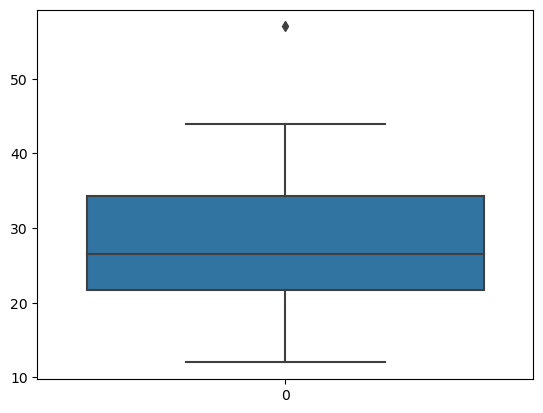

In [14]:
sns.boxplot(prices)

### Q9. Find the percentile rank of the datapoint 25.

In [15]:
percentile_rnk = (len(np.array(prices)[np.array(prices)<=25])/n)*100
print(' the percentile rank of the datapoint 25:',percentile_rnk)

 the percentile rank of the datapoint 25: 42.5


### Q10. What is the probability that a shirt cost is above 25 dollars?

In [16]:
# number of shirt that cost above 25$
count = 0
for i in prices:
    if i >25:
        count+=1
probability =(count/n)*100
print('the probability that a shirt cost is above 25 dollars:',round(probability,1))

the probability that a shirt cost is above 25 dollars: 57.5


### Q11. Create a frequency distribution for the data and visualize it appropriately

In [17]:
pd.Series(prices).value_counts()

27    4
35    4
26    3
22    2
29    2
24    2
23    2
12    2
15    2
20    2
21    1
34    1
44    1
43    1
42    1
40    1
38    1
33    1
31    1
30    1
18    1
14    1
19    1
25    1
57    1
dtype: int64

<AxesSubplot: ylabel='Density'>

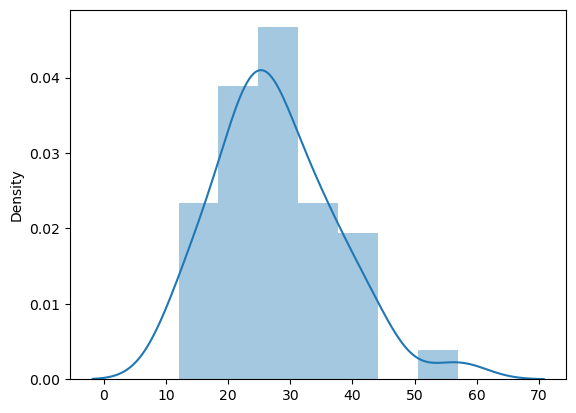

In [18]:
sns.distplot(prices)

In [19]:
# the distribution is slightly right skewed

### Q12. Create a probability distribution of the data and visualize it appropriately. 

In [20]:
frequency = []
price = []
for i in pd.Series(prices).unique():
    price.append(i)
    frequency.append(prices.count(i))

prob = []
for i in frequency:
    prob.append((i/n)*100)
prob

pd.DataFrame(data = [price,frequency,prob],index=['price','frequency','probablity']).T

,price,frequency,probablity
0,12.0,2.0,5.0
1,14.0,1.0,2.5
2,15.0,2.0,5.0
3,18.0,1.0,2.5
4,19.0,1.0,2.5
5,20.0,2.0,5.0
6,21.0,1.0,2.5
7,22.0,2.0,5.0
8,23.0,2.0,5.0
9,24.0,2.0,5.0


<AxesSubplot: ylabel='Density'>

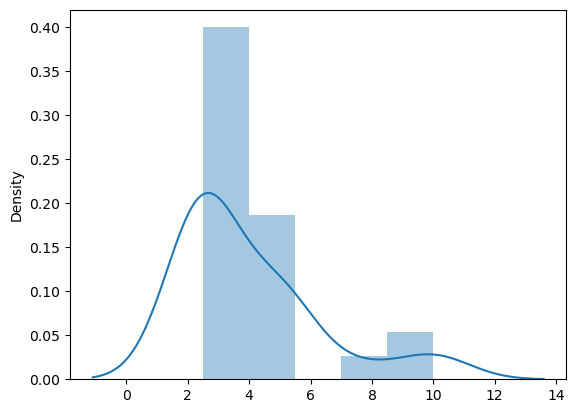

In [21]:
sns.distplot(prob,kde=True)

### Q13. What is the shape of the distribution of this dataset? Create anappropriate graph to determine that. Take 100 random samples withreplacement from this dataset of size 5 each. Create a sampling distribution ofthe mean shirt prices. Compare with other sampling distributions of samplesize 10, 15, 20, 25, 30. State your observations. Does it corroborate theCentral Limit Theorem?


<AxesSubplot: ylabel='Density'>

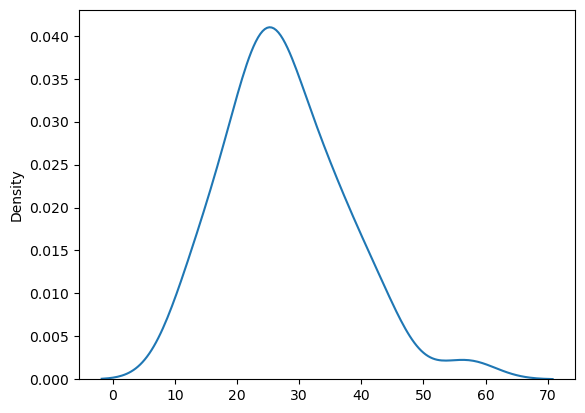

In [22]:
sns.kdeplot(prices)

In [23]:
#  The histogram shows that the distribution is slightly skewed to the right

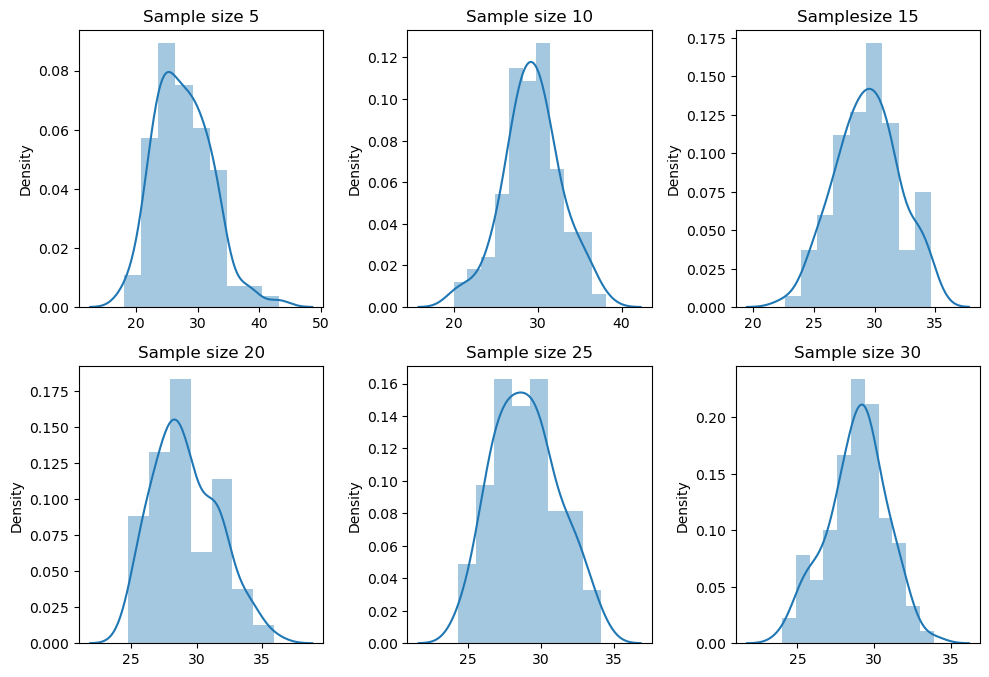

In [24]:
sample_size = [5,10,15,20,25,30]
name = ['Sample size 5','Sample size 10','Samplesize 15','Sample size 20','Sample size 25','Sample size 30']
count = 0
plt.figure(figsize=(10,10))
for i in sample_size:
    sample_mean=[]
    for j in range(100):
        sample = np.random.choice(price,size=i,replace=True)
        sample_mean.append(np.mean(sample)) 
    plt.subplot(3,3,count+1)        
    sns.distplot(sample_mean)
    plt.title(name[count])
    count+=1
plt.tight_layout()
plt.show()

In [25]:
# all the sample size are almost normal.
# It does corroborate the Central Limit Theorem.

### Q14. Treat this dataset as a binomial distribution where p is the probability that a shirt costs above 25 dollars. What is the probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars?

In [26]:
stats.binom.sf(7,10,0.575)

0.1302773310891879

In [27]:
# The probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars is 13.02 %

### Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 dollars . Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars.

In [28]:
stats.binom.cdf(6,10,0.6)

0.6177193984000001

In [29]:
# The probability that out of a random sample of 10 shirts 7 of them will cost less than 25 dollars is 61.77 %

### Q16. Compute a 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [30]:
# population standard deviation is not mentioned so we'll use t test

In [31]:
xbar = np.mean(prices)
s = np.std(prices,ddof=1)
n = 40

# calculate  95% Confidence Interval of t distribution
tstats = stats.t.isf(0.025,df=n-1)

interval = xbar-(tstats*(s/(n**0.5))),xbar+(tstats*(s/(n**0.5)))
interval

(24.54746133758517, 30.70253866241483)

In [32]:
stats.t.interval(0.95,loc=xbar,scale=(s/np.sqrt(n)),df=n-1)

(24.547461337585172, 30.702538662414828)

### Q17. A data scientist wants to estimate with 95% confidence the true proportion of shirts having price greater than 25 dollars in the NuCloth website. A recent study showed that 60% of all shirts have a price greater than 25 dollars. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.


In [33]:
# the point estimator is 0.6
point_estimator = 0.6
margin_error = 0.02
z = 1.96 # (Zα/2)

# n = sample size
# margin_error = z * ((((point_estimator*(1-point_estimator))/n))**0.5)

n = ((z**2)*(point_estimator*(1-point_estimator))) / (margin_error**2)
n

2304.9599999999996

In [34]:
# the minimum sample size necessary is 2305

### Q18. The same data scientist wants to estimate the true proportion of shirts having price greater than 25 dollars. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.


In [35]:
# the point estimator is 0.6
point_estimator = 0.6
margin_error = 0.05
z = 1.64 # (Zα/2 of 90% confidence)

# n = sample size
# margin_error = z * ((((point_estimator*(1-point_estimator))/n))**0.5)

n = ((z**2)*(point_estimator*(1-point_estimator))) / (margin_error**2)
n

258.20159999999987

In [36]:
# the minimum sample size necessary is 258.

### Q19. NuCloth claims that currently 80% of all shirts have prices greater than 25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 shirts only 23 are having prices above 25 dollars.

In [37]:
# Null hypothesis H0: The shirts with prices greater than 25 is 0.80  
# Alternative hypothesis H1: The shirts with prices lesser than 25 is 0.80  

In [38]:
probablity = 23/30
point_estimator = 0.80
n = 30 # sample size

In [39]:
tstats = (probability-point_estimator)/(((point_estimator*(1-point_estimator))/n)**0.5)
tstats

776.396725263573

In [40]:
stats.t.sf(tstats,df=n-1)

1.8114173705512834e-64

In [41]:
# pvalue less than the significance level (0.05)
# we reject null hypothesis

### Q20. A data scientist is researching the hypothesis that the average price of a shirt in NuCloth is higher than the supermarket. So he collects data from NuCloth and the supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34 dollars in the supermarket. The standard deviations are 7.6 and 5.8 respectively.Suppose the data scientist got these values after randomly selecting 100 shirts from each place.
    a. What hypothesis would he use to compare the shirt prices of NuCloth vs
    Supermarket
    b. What are critical values to be used?
    c. What statistical test will be used to compare these prices?
    d. Complete the test and obtain the P-value.
    e. Summarize his conclusion based on the P-value.

In [42]:
# H0: the average price of a shirt in NuCloth is less than the supermarket   mu1 <= mu2
# H1: the average price of a shirt in NuCloth is higher than the supermarket  mu1 > mu2

In [43]:
# alpha is not mentioned so by default we use alpha = 0.05
# critical value for 95%
stats.norm.isf(0.025)

1.9599639845400545

In [44]:
# we are comparing means prices of two independent populations therefore we'll use Two Sample z-test  

In [45]:
x1 = 36  # nucloth mean
x2 = 34  # supermarket mean
s1 = 7.6 # nucloth standard deviation
s2 = 5.8 # supermarket standard deviation
n = 100  # sample size

In [46]:
zstats =  (x1 - x2) /((s1**2/n) + (s2**2/n))**0.5
zstats

2.09197696327652

In [47]:
stats.norm.sf(zstats)

0.018220288245112185

In [48]:
# zstats > critical value
# pvalue < significance level (α = 0.05)
# we reject null hypothesis

## Part-B

### 1. Read the datasets, Check the data types and Change the data types appropriately.

In [49]:
df = pd.read_json(r"C:\Users\kunal\OneDrive\Desktop\EDA STAS Mini Project\modcloth_final_data.json",lines=True)
df.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [50]:
df.shape

(82790, 18)

In [51]:
df.dtypes

item_id             int64
waist             float64
size                int64
quality           float64
cup size           object
hips              float64
bra size          float64
category           object
bust               object
height             object
user_name          object
length             object
fit                object
user_id             int64
shoe size         float64
shoe width         object
review_summary     object
review_text        object
dtype: object

In [52]:
df.select_dtypes(include='object')

,cup size,category,bust,height,user_name,length,fit,shoe width,review_summary,review_text
0,d,new,36,5ft 6in,Emily,just right,small,NaN,NaN,NaN
1,b,new,NaN,5ft 2in,sydneybraden2001,just right,small,NaN,NaN,NaN
2,b,new,NaN,5ft 7in,Ugggh,slightly long,small,NaN,NaN,NaN
3,dd/e,new,NaN,NaN,alexmeyer626,just right,fit,NaN,NaN,NaN
4,b,new,NaN,5ft 2in,dberrones1,slightly long,small,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
82785,b,outerwear,NaN,5ft 8in,Jennifer,just right,fit,average,Cute jacket!,Cute jacket!
82786,ddd/f,outerwear,NaN,5ft 5in,Kelli,slightly long,small,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...
82787,dddd/g,outerwear,NaN,5ft 4in,elacount,just right,fit,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...
82788,NaN,outerwear,NaN,5ft 3in,jennaklinner,just right,fit,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...


In [53]:
df['bust'].unique()

array(['36', nan, '39', '34', '43', '35', '38', '33', '40', '41', '44',
       '45', '37', '30', '32', '42', '48', '46', '51', '25', '31', '26',
       '52', '22', '50', '47', '56', '58', '49', '54', '55', '53', '27',
       '28', '29', '20', '57', '23', '37-39', '24', '59'], dtype=object)

In [54]:
df['bust'] = df['bust'].replace('37-39','37')

In [55]:
df['bust']=df['bust'].astype(float)

### 2. Change the height column datatype to float after converting the values as shown Below. 5.7

In [56]:
df['height'].unique()

array(['5ft 6in', '5ft 2in', '5ft 7in', nan, '5ft 4in', '5ft 3in',
       '5ft 5in', '5ft 10in', '5ft 8in', '5ft', '5ft 9in', '5ft 1in',
       '5ft 11in', '4ft 11in', '4ft 10in', '6ft', '3ft 4in', '4ft 9in',
       '6ft 3in', '6ft 1in', '6ft 2in', '3ft', '4ft 7in', '4ft 4in',
       '7ft 11in', '4ft 2in', '6ft 6in', '4ft 8in', '6ft 4in', '3ft 11in',
       '6ft 5in', '7ft 6in', '3ft 6in', '3ft 3in', '6ft 8in', '7ft 5in',
       '7ft 3in', '7ft 7in', '6ft 7in', '4ft 5in', '3ft 2in', '4ft 6in'],
      dtype=object)

In [57]:
df['height']=df['height'].apply(lambda x:str(x).replace('ft','').replace('in','').replace(' ','.'))

In [58]:
df['height']=df['height'].astype(float)

### 3. Rename the names of the columns which have space in between the column. Ex: shoe size as shoe_size etc.

In [59]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup size', 'hips', 'bra size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe size', 'shoe width', 'review_summary', 'review_text'],
      dtype='object')

In [60]:
df.rename(columns={'cup size':'cup_size','bra size':'bra_size','shoe size':'shoe_size','shoe width':'shoe_width'},inplace=True)

In [61]:
df.columns

Index(['item_id', 'waist', 'size', 'quality', 'cup_size', 'hips', 'bra_size',
       'category', 'bust', 'height', 'user_name', 'length', 'fit', 'user_id',
       'shoe_size', 'shoe_width', 'review_summary', 'review_text'],
      dtype='object')

###  4. Check the missing values and Identify the distribution of the variables to impute the missing values. Explain based on your analysis decide the features which can be dropped and Which can be imputed. And also explain the reason to choose the metric that you have chosen to impute the null values.


In [62]:
null_values=df.isnull().sum()
percentage=round((df.isnull().sum()/df.shape[0])*100,2)
pd.concat([null_values,percentage],axis=1,keys=['null_values','null_values_percentage'])

,null_values,null_values_percentage
item_id,0,0.00
waist,79908,96.52
size,0,0.00
quality,68,0.08
cup_size,6255,7.56
hips,26726,32.28
bra_size,6018,7.27
category,0,0.00
bust,70936,85.68
height,1107,1.34


In [63]:
df_mean = pd.DataFrame(df.mean(), columns=['Mean'])
df_median = pd.DataFrame(df.median(),columns=['Median'])
pd.concat([df_mean, df_median],axis=1)

,Mean,Median
item_id,469325.229170,454030.0
waist,31.319223,30.0
size,12.661602,12.0
quality,3.949058,4.0
hips,40.358501,39.0
bra_size,35.972125,36.0
bust,37.499156,36.0
height,5.456365,5.5
user_id,498849.564718,497913.5
shoe_size,8.145818,8.0


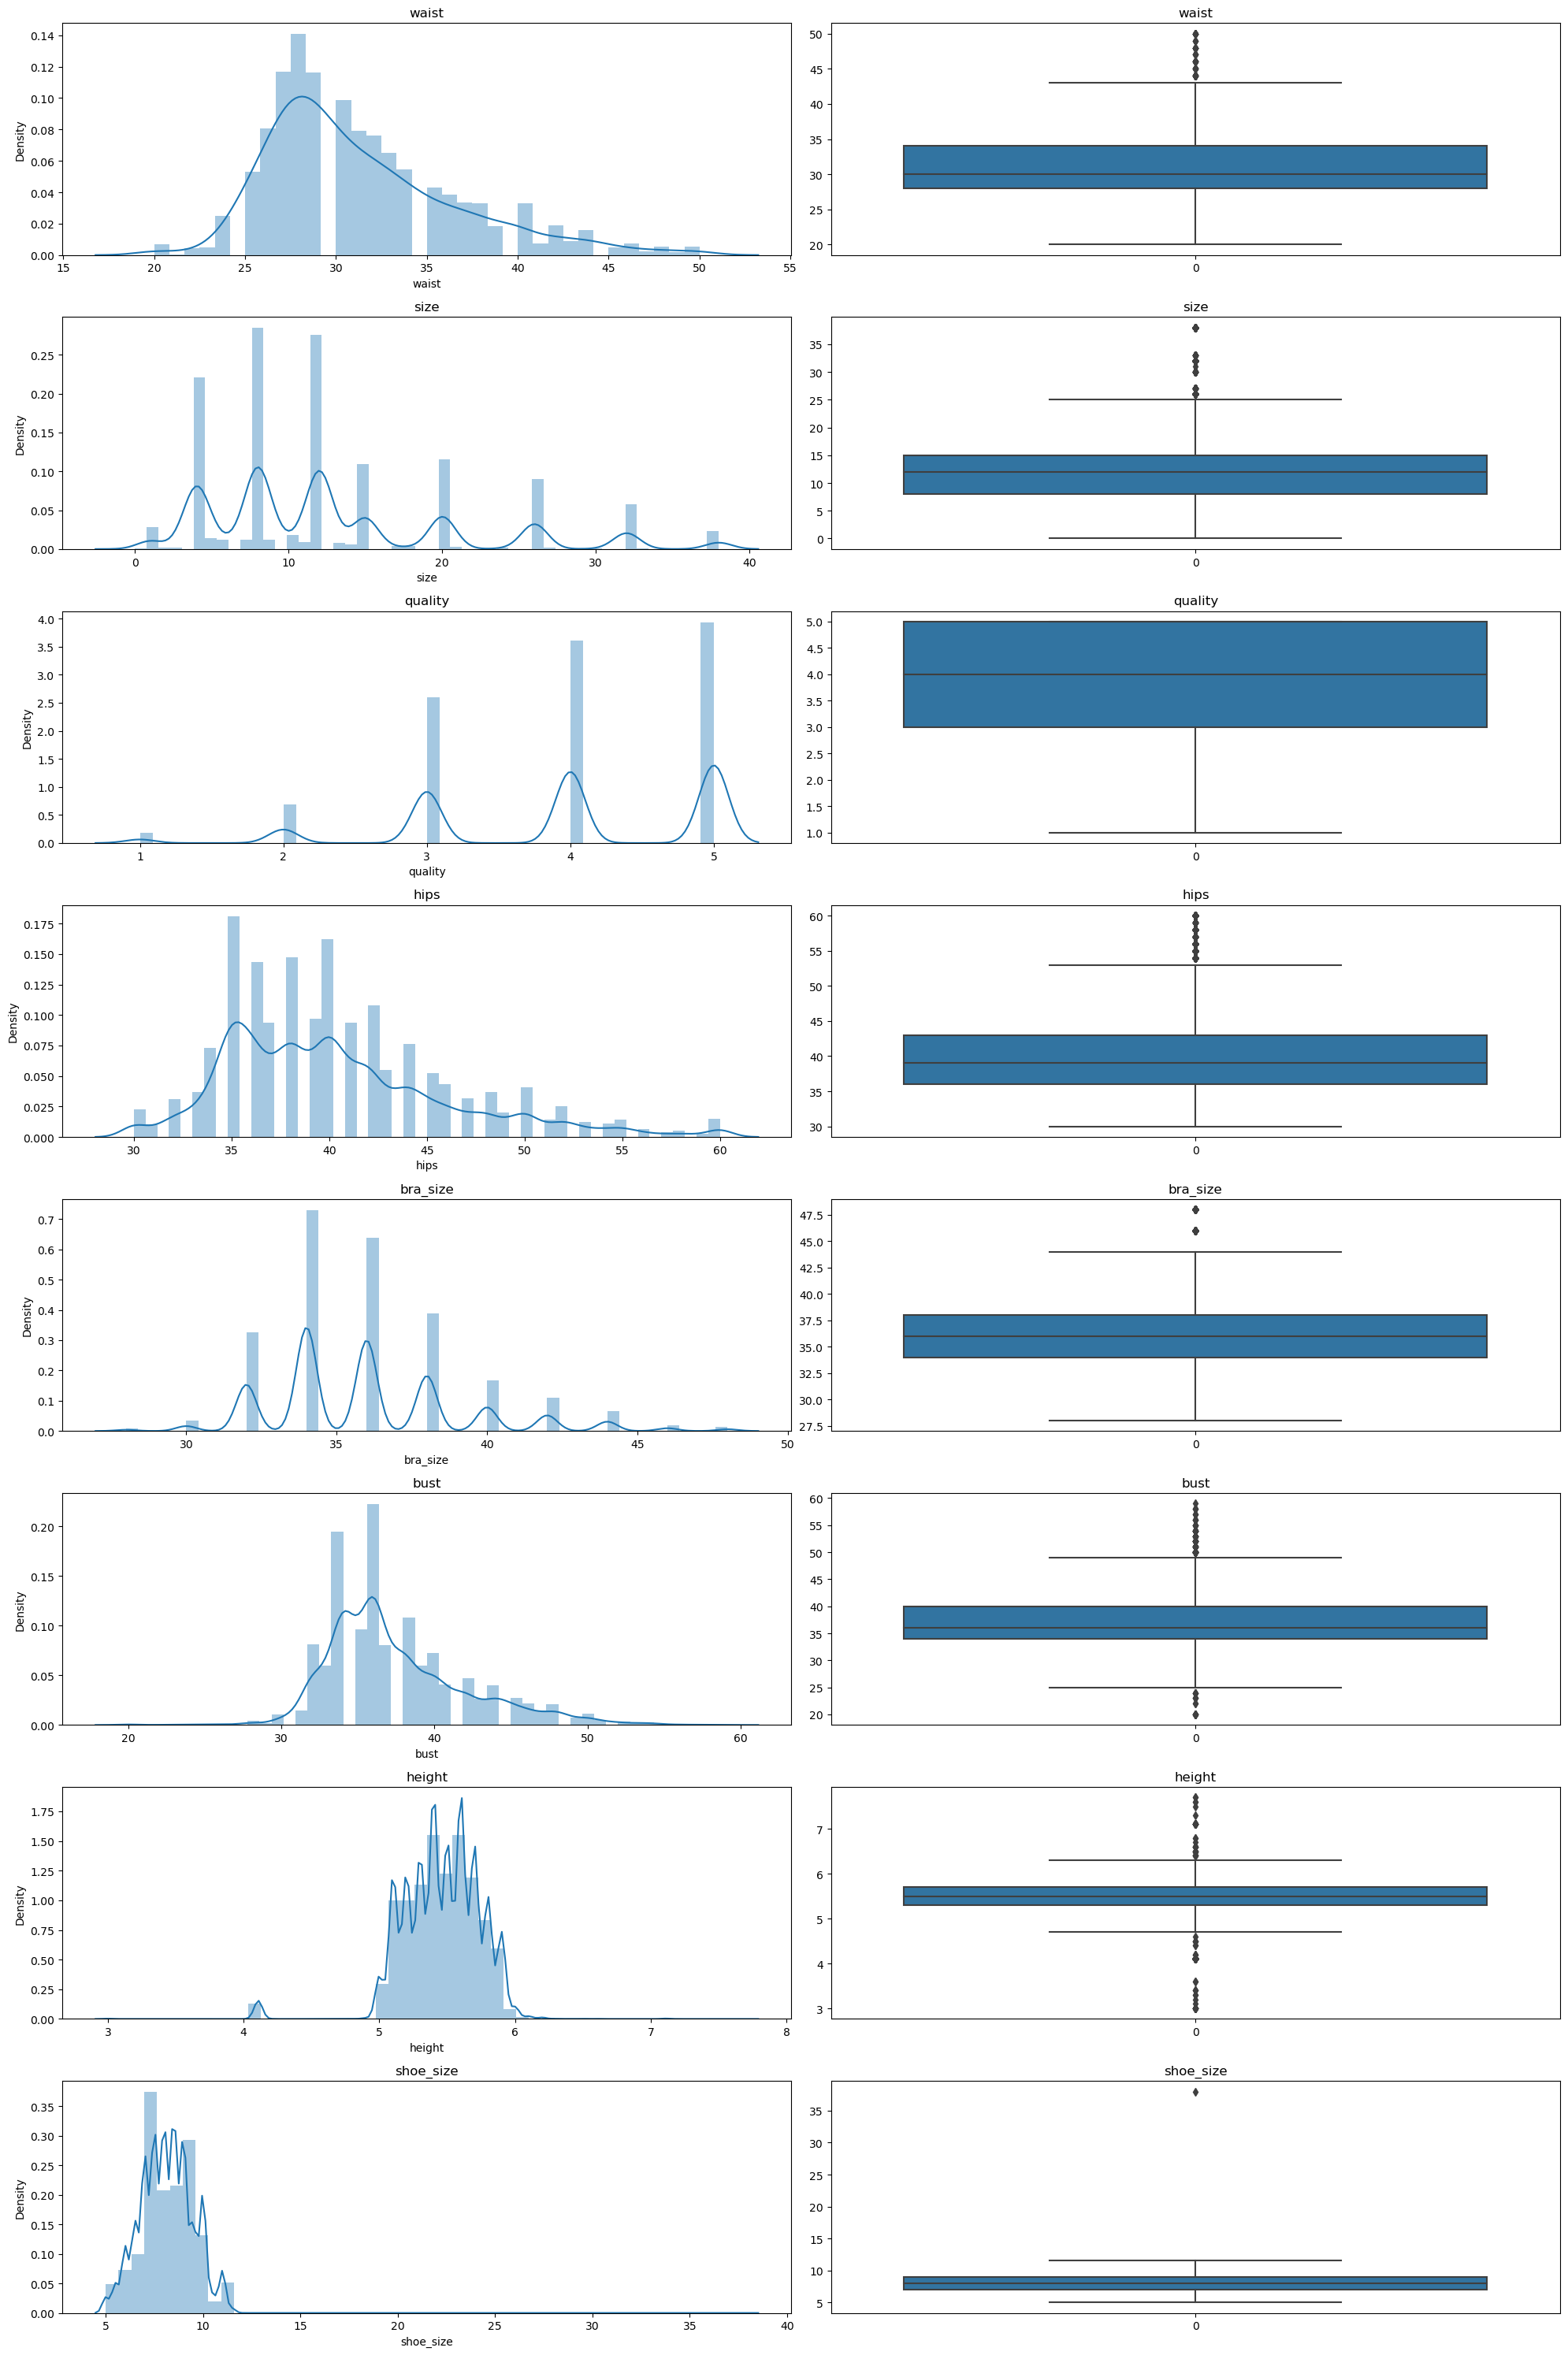

In [64]:
df_num = ['waist', 'size', 'quality', 'hips', 'bra_size', 'bust', 'height','shoe_size']
count = 0

plt.figure(figsize=(20,30))
for i in df_num:
    
    plt.subplot(8,2,count+1)        
    sns.distplot(df[i])
    plt.title(i)
    count+=1
    plt.subplot(8,2,count+1)        
    sns.boxplot(df[i])
    plt.title(i)
    count+=1
    
plt.tight_layout()
plt.show()

In [ ]:
# Waist - both the plots show the distribution have outliers and the density plot show it is postivly skewed data with positive outliers

# Size: is multimodal and the positively skewed the box plot show the indication of extreme outlier 

# Quality: the box plot indicates the maximum is its upper whisker and as well as the data is not extreme . Multimodal 

# Hips: the distribution is positively skewed , boxplot also supports the postive skew by postive outliers 

# Bra size: multimodal and few extreme values indicating skew ness

# Height: the kde line indicates most of the data in centre but it has postive outliers and negative outliers and also skewed

# Shoe size: data had most outliers and inter quartile range is mostly in between 5-6 indicating most of the values are distributed in very less range

# Shoe size : has no outliers yet data is not equally distributed 

# Therefore we could say the data has not normally distributed and the existence of outliers indicates the skewedness in data

In [65]:
df.skew()

item_id     -0.120644
waist        0.993061
size         1.128301
quality     -0.676777
hips         0.969187
bra_size     0.901004
bust         0.951970
height      -1.095275
user_id      0.008201
shoe_size    0.436713
dtype: float64

In [ ]:
# item_id, quality, height this columns are negatively skewed.
# waist, size, hips, bra_size, bust, user_id, shoe_size this columns are positively skewed.

In [66]:
df.kurt()

item_id     -1.215909
waist        0.836624
size         0.760010
quality     -0.167085
hips         0.848464
bra_size     1.039445
bust         1.207727
height       5.311308
user_id     -1.182436
shoe_size    8.448820
dtype: float64

In [ ]:
# The negative kurtosis value of -1.215909 indicates that the distribution of "item_id" is platykurtic. 

# The positive kurtosis value of 0.836624 suggests that the distribution of "waist" is slightly leptokurtic.

# Similar to "waist," the positive kurtosis value of 0.760010 indicates that the distribution of "size" is slightly leptokurtic.

# The small negative kurtosis value of -0.167085 suggests that the distribution of "quality" is platykurtic.

# The positive kurtosis value of 0.848464 suggests that the distribution of "hips" is slightly leptokurtic.

# The positive kurtosis value of 1.039445 indicates that the distribution of "bra_size" is leptokurtic. 

# Similar to "bra_size," the positive kurtosis value of 1.207727 indicates that the distribution of "bust" is leptokurtic.

# The very high positive kurtosis value of 5.311308 suggests that the distribution of "height" is significantly leptokurtic.

# The negative kurtosis value of -1.182436 indicates that the distribution of "user_id" is platykurtic. 

# The extremely high positive kurtosis value of 8.448820 suggests that the distribution of "shoe_size" is extremely leptokurtic.

### Null-values treatment

In [67]:
# dealing with null values quality
df['quality']=df['quality'].fillna(df['quality'].median())

In [68]:
# dealing with null values height

# as there are only 1.34% of missing values we can impute it with mean
df['height']=df['height'].fillna(df['height'].mean())

<AxesSubplot: >

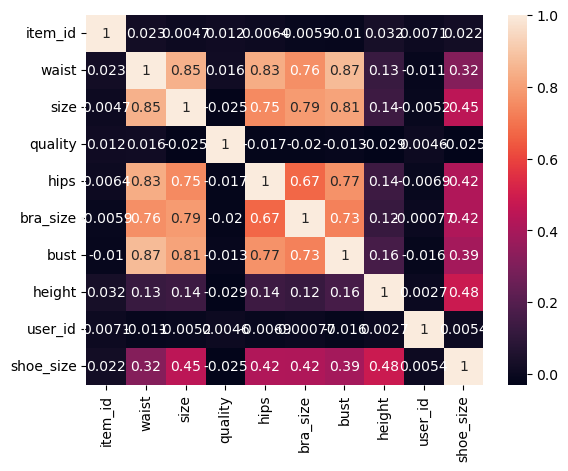

In [69]:
#  Checking the correlation between all columns.
sns.heatmap(df.corr(),annot=True)

In [70]:
# dealing with null values shoe_size

# even with 66% of null values in shoe size there is 0.48 correlation between shoe size and height
df['height'].corr(df['shoe_size']) 

0.48499357520095093

In [71]:
# we cannot directly impute it with median as the correlation decreased.
df['height'].corr(df['shoe_size'].fillna(df['shoe_size'].median()))

0.2846200052717339

In [72]:
#Grouping the data by heights and finding medians of each shoe size and imputing it with those heights.
medians_by_height=df.groupby('height')['shoe_size'].median()

In [73]:
print("Before filling missing values:",df['shoe_size'].isnull().sum())
print()

# Fill missing values
df['shoe_size']=df.groupby('height')['shoe_size'].apply(lambda x:x.fillna(x.median()))

print("After filling missing values:",df['shoe_size'].isnull().sum())
print()

Before filling missing values: 54875

After filling missing values: 50



In [74]:
# there are 50 more null values after median imputation for each height, filling those missing values with median

In [75]:
df['height'].corr(df['shoe_size']) 

0.640347030335841

In [ ]:
# correlation value after imputation i.e; near strong correlation

In [76]:
# trying to fill the null values with median 
df['height'].corr(df['shoe_size'].fillna(df['shoe_size'].median()))

0.6323307449419252

In [77]:
# the correlation value is decreasing so filling those 50 null values by condition based on categorizing height

def condition(x):
    if x <= 4.8:
        return 'very short'
    elif 4.8 < x <= 5.1:
        return 'short'
    elif 5.1 < x <= 5.5:
        return 'good'
    elif 5.5 < x <= 5.10:
        return 'tall'
    elif x > 5.10:
        return 'very tall'
df['height_cat']=df['height'].apply(condition)

In [78]:
height_cat_medians=df.groupby('height_cat')['shoe_size'].median()
height_cat_medians

height_cat
good          8.0
short         7.5
very short    6.0
very tall     8.5
Name: shoe_size, dtype: float64

In [79]:
df['shoe_size']=df.apply(lambda x: height_cat_medians[x['height_cat']] if pd.isnull(x['shoe_size']) else x['shoe_size'],axis=1)

In [80]:
df['height'].corr(df['shoe_size']) 

0.6376178637278138

In [81]:
# this is also decreasing the correlation value but comparitively better imputation

<AxesSubplot: xlabel='height', ylabel='shoe_size'>

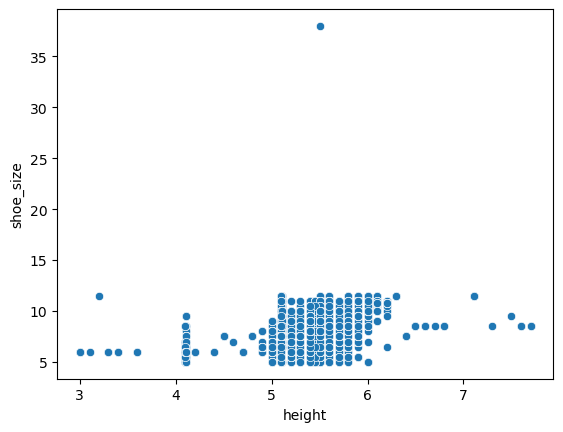

In [82]:
sns.scatterplot(y=df['shoe_size'],x=df['height'])

In [83]:
# dealing with null values of shoe_width
# 77 % are null values so imputation should be done carefully

In [ ]:
# As the shoe width have large number of null values we are imputing it on the basis of shoe size.
# the shoe size and height is correlated therefore we will check for the mode of shoe width for each heigth_category.

In [84]:
(df['shoe_width'][df['height_cat']=='very short']).mode()

0    average
Name: shoe_width, dtype: object

In [85]:
(df['shoe_width'][df['height_cat']=='short']).mode()

0    average
Name: shoe_width, dtype: object

In [86]:
(df['shoe_width'][df['height_cat']=='good']).mode()

0    average
Name: shoe_width, dtype: object

In [87]:
(df['shoe_width'][df['height_cat']=='very tall']).mode()

0    average
Name: shoe_width, dtype: object

In [88]:
# as all the height category have same shoe_width mode we can directly impute the mode of shoe_width.

In [89]:
df['shoe_width'].value_counts()/df.shape[0]

average    0.158195
wide       0.047808
narrow     0.018746
Name: shoe_width, dtype: float64

In [90]:
df['shoe_width'] = df['shoe_width'].fillna(df['shoe_width'].mode()[0])

In [91]:
# dealing with null values of waist

df['waist']=df.groupby('height')['waist'].apply(lambda x:x.fillna(round(x.mean(),2)))

In [92]:
df['waist'].isnull().sum()

199

In [93]:
df['waist']=df['waist'].fillna(round(df['waist'].mean(),2))

In [94]:
# dealing with null values of bust 

df['bust']=df.groupby('bra_size')['bust'].apply(lambda x:x.fillna(round(x.mean(),2)))

In [95]:
df['bust'].isnull().sum()

6018

In [96]:
df['bust'].fillna(method='ffill',inplace=True)

In [97]:
# dealing with null values of bra_size 

df['bra_size']=df.groupby('bust')['bra_size'].apply(lambda x:x.fillna(round(x.median(),2)))

In [98]:
# dealing with null values of cup size

df['cup_size']=df.groupby('bra_size')['cup_size'].apply(lambda x:x.fillna(x.mode().iloc[0]))

In [99]:
# dealing with null values of hips

df['hips']=df.groupby('height')['hips'].apply(lambda x:x.fillna(round(x.median(),2)))

In [100]:
df['hips']=df['hips'].fillna(df['hips'].mean())

In [101]:
# dealing with null values of length

df['length'].fillna(df['length'].mode().iloc[0],inplace=True)

In [102]:
df.isnull().sum()

item_id              0
waist                0
size                 0
quality              0
cup_size             0
hips                 0
bra_size             0
category             0
bust                 0
height               0
user_name            0
length               0
fit                  0
user_id              0
shoe_size            0
shoe_width           0
review_summary    6725
review_text       6725
height_cat           0
dtype: int64

### 5. Find the outliers which are below and above 2.5 * IQR - Q1 and 2.5 * IQR + Q3. 

In [103]:
for i in ['waist', 'size', 'quality', 'hips', 'bra_size','bust', 'height','shoe_size']:
    print('Outliers in column:',i)
    quartile1 = np.percentile(df[i],25)
    quartile3 = np.percentile(df[i],75)
    IQR = quartile3-quartile1
    lowerllimit = quartile1-2.5*IQR
    upperlimit = quartile3+2.5*IQR
    outliers=[]
    for j in df[i]:
        if j<lowerlimit or j>upperlimit:
            if j not in outliers:
                outliers.append(j)
    print(outliers)

Outliers in column: waist
[37.3, 34.0, 44.0, 49.0, 37.0, 42.0, 35.0, 36.0, 40.0, 38.0, 48.0, 41.0, 39.0, 45.0, 43.0, 46.0, 47.0, 50.0]
Outliers in column: size
[33, 38, 1, 0, 2]
Outliers in column: quality
[2.0, 1.0]
Outliers in column: hips
[60.0, 52.0, 55.0, 53.0, 54.0, 59.0, 57.0, 58.0, 56.0]
Outliers in column: bra_size
[]
Outliers in column: bust
[56.0, 58.0, 57.0, 59.0]
Outliers in column: height
[7.11, 7.6, 6.8, 7.5, 7.3, 7.7]
Outliers in column: shoe_size
[11.5, 38.0]


### 6. Check for the category dress top 10 reviews. Identify the negative reviews if there are any

In [104]:
(df['review_text'][df['category']=='dresses']).value_counts().head(10)

Love this dress!      32
Love it!              27
Love it               25
.                     10
I love this dress!     9
Great dress!           8
love it!               8
Perfect!               8
Love!                  7
Cute dress!            6
Name: review_text, dtype: int64

In [105]:
# negative reviews for the category dresses
df['review_text'][(df['category']=='dresses')&df['review_text'].str.contains('sad|bad|disappointment|not|no',case=False,na=False)]

8490     This dress. Is so amazing. It just arrived tod...
8492     I managed to get this dress in my Stylish Surp...
8496     These reviews got me so excited. I'd like to r...
8497     I love the print. The fabric is thin and soft....
8498     I LOVE this dress! It's so beautiful and class...
                               ...                        
28605    I am sadly really disappointed with this dress...
28607    I am absolutely in love with this dress. I hav...
28608    As a bigger girl I'm usually terrified to orde...
28611    Lovely dress  the cut is very flattering, with...
28613    Love, love, love this dress!  And I can't wait...
Name: review_text, Length: 7066, dtype: object

In [106]:
# there are 7066 negative reviews and 18650 positive reviews for dress categories

### 7. Find out the average shoe size for the different fits of the customer. Visualizeusing any relevant plot. Explain that, Is there any significant different shoe sizes for different fits?


In [107]:
df.groupby('fit')['shoe_size'].mean()

fit
fit      8.100371
large    8.139559
small    8.195140
Name: shoe_size, dtype: float64

<AxesSubplot: xlabel='fit', ylabel='shoe_size'>

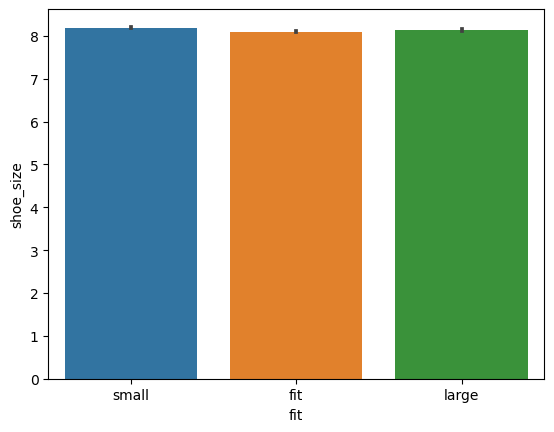

In [108]:
sns.barplot(x=df['fit'],y=df['shoe_size'])

In [109]:
# as we see through the values and the graph that there is no significant difference in shoe sizes for different fits.

### 8. Identify the customer’s common shoe width and average size for those who purchased the maximum quality. Is the mode of shoe width affect the user review? Visualize using the appropriate plot.



In [110]:
(df['shoe_width'][df['quality']==5]).value_counts()

average    27564
wide        1433
narrow       607
Name: shoe_width, dtype: int64

<AxesSubplot: xlabel='shoe_width', ylabel='count'>

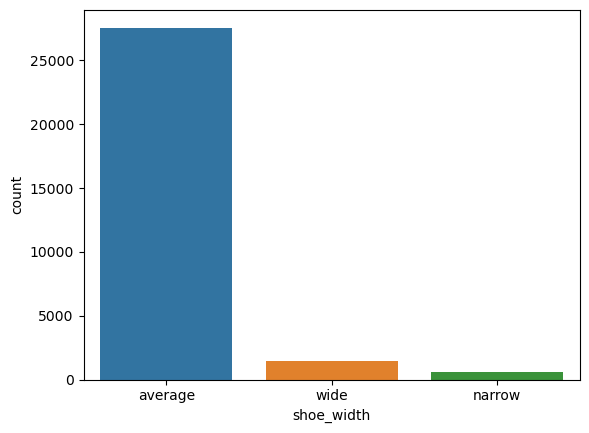

In [111]:
sns.countplot(x=df['shoe_width'][df['quality']==5])

In [112]:
(df['size'][df['quality']==5]).mean()

12.455918119173084

<AxesSubplot: >

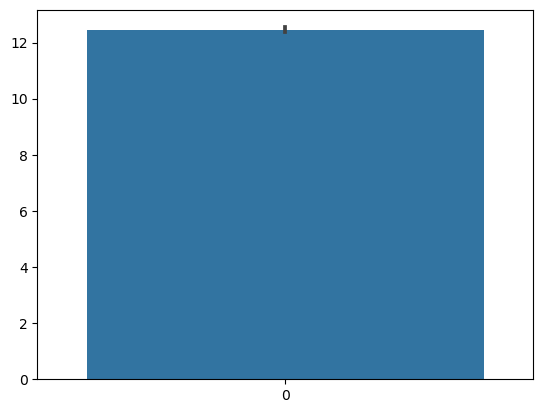

In [113]:
sns.barplot(df['size'][df['quality']==5])

In [114]:
# Null Hypothesis (H0): The mode of shoe width affect the user review.
# Alternative Hypothesis (H1): The mode of shoe width does not affect the user review.

In [115]:
stats,pvalue,dof,exp=stats.chi2_contingency(pd.crosstab(df['shoe_width'],df['review_summary']))
pvalue

7.394927005198247e-21

In [116]:
# pvalue < significance level (assuming 0.05)
# we reject null hypothesis
# Mode of shoe width does not affect review.

### 9. Extract the records belonging to the top 10 reviews, and then find the review summary for the different cup

In [117]:
df['review_text'].value_counts().head(10)

Love it!            153
Love it              81
.                    76
Perfect!             56
Love!                53
Love                 48
Love this dress!     35
Perfect              29
love it!             27
Great!               23
Name: review_text, dtype: int64

In [118]:
df.groupby('cup_size')['review_summary'].unique()

cup_size
a         [nan, I love the design and fit, I snagged thi...
aa        [nan, I wore this for a Valenti, Super cute, b...
b         [nan, Too much ruching, Super Flattering!, Wan...
c         [nan, Suits my body type!, Beautiful Dress!, T...
d         [nan, I'm simply too tall for t, Love it! Very...
dd/e      [nan, One of the better quality, Fit great., T...
ddd/f     [nan, Very nice dress, well mad, This dress cr...
dddd/g    [nan, Love it! Comfortable, fla, this is a gre...
h         [nan, The crossover at the bust, Have worn thi...
i         [nan, Snug across the girls. Fi, Bought for a ...
j         [nan, Reviews aren't kidding  i, I'm so glad I...
k         [nan, My only beef with this dr, This dress hu...
Name: review_summary, dtype: object

### 10. Identify the most common review that we got from the customer whose hips size is greater than 35. Find out what kind of inference you can make

In [119]:
(df['review_text'][df['hips']>35]).value_counts()

Love it!                                                                                                 127
Love it                                                                                                   74
.                                                                                                         70
Love!                                                                                                     49
Perfect!                                                                                                  46
                                                                                                        ... 
Strangers walked up to me at the zoo and told me how great this looked. :)                                 1
A bit more snug than I'd like in the arms, but 100% wearable. I get a lot of compliments on this one.      1
perfect knit weight. love that I can wear it different ways for different looks.                           1
Had to return becau

In [120]:
# the most common review that we got from the customer is 'Love it!'
# and all the reviews are positive.

### 11. What is the relationship between height and waist? Describe what kind of relationship it has.

<AxesSubplot: xlabel='height', ylabel='waist'>

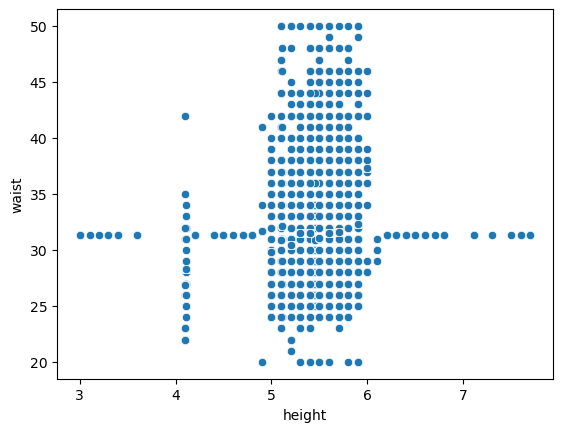

In [121]:
sns.scatterplot(x = df['height'],y=df['waist'])

In [122]:
# There is no relation between them.

### 12. Plot the pair plot for the numerical plot. Explain according to your problem statement how the pair plot would help you.


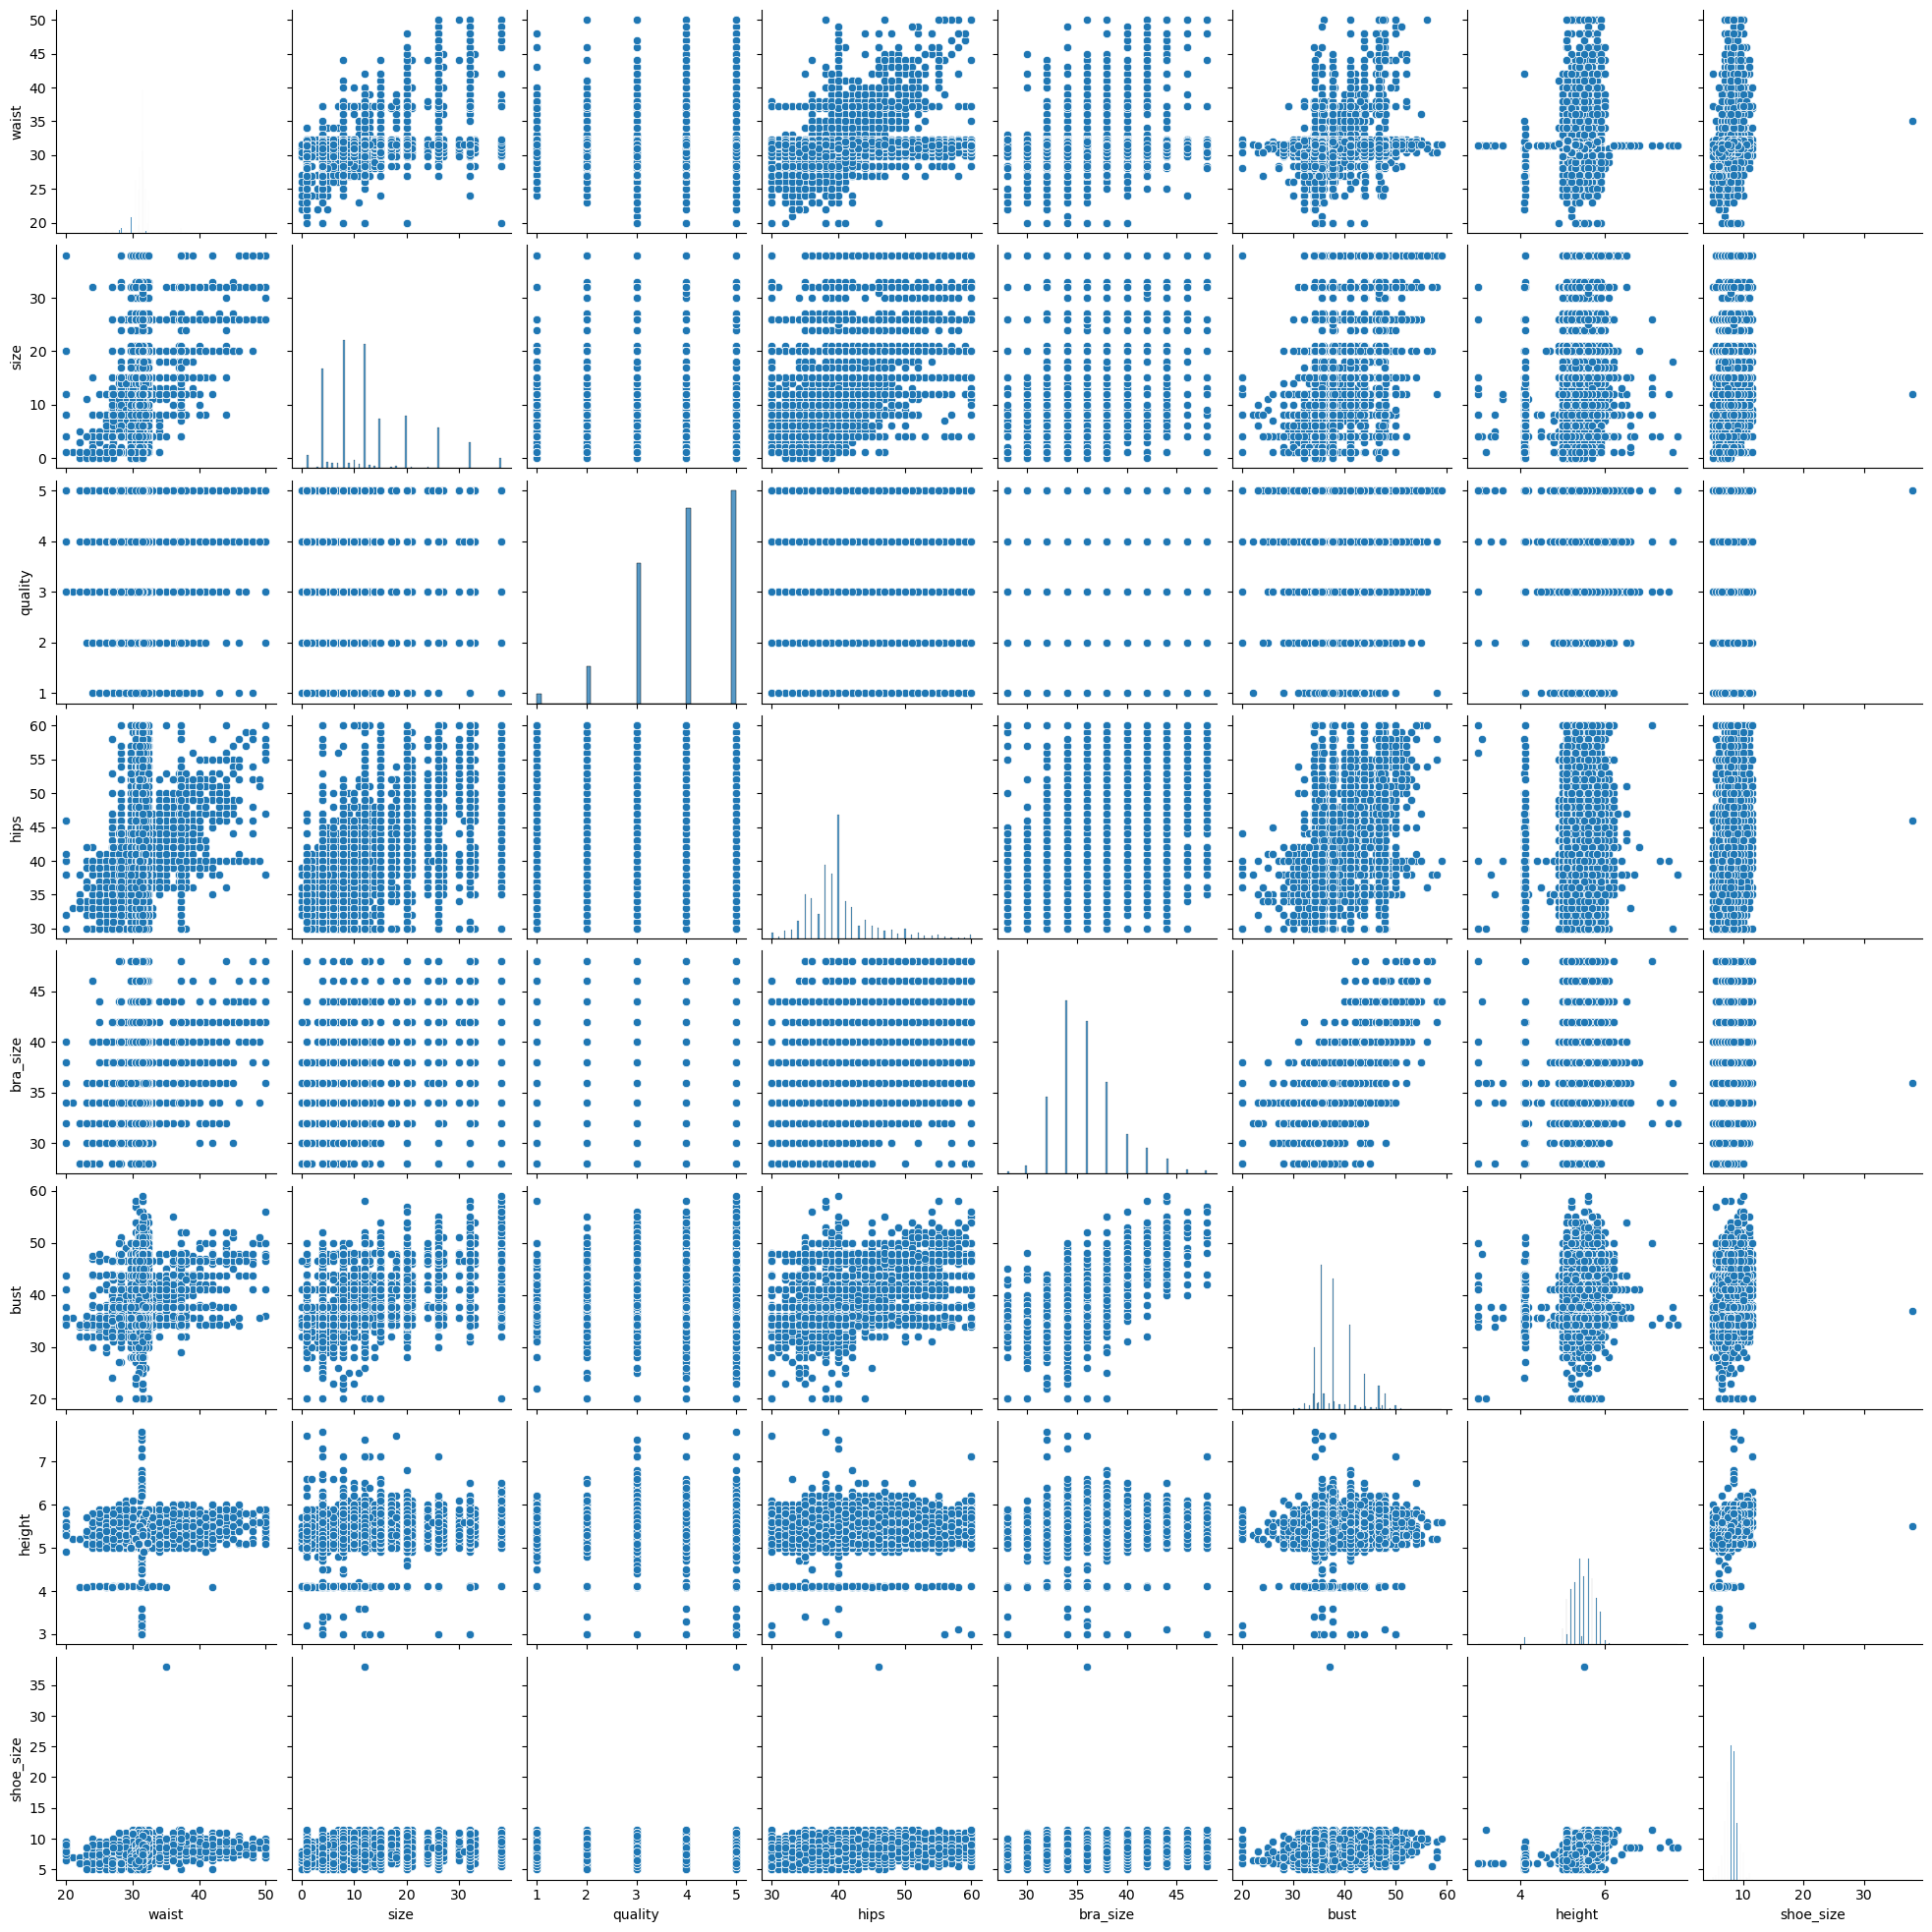

In [123]:
sns.pairplot(df[['waist', 'size', 'quality', 'hips', 'bra_size','bust', 'height','shoe_size']])

In [124]:
# Size-bust 
# Size-wais
# Size-hips 
# Hips-size
# Hips-bust
# Hips-waist
# Variables like quality , shoe size shows no linear relationship 
# And vise versa of  most of these show linear relationship

# Waist-hips
# Waist-size
# Waist-bra size
# This indicates the variables are either weak postive linear relation or zero linear relationship

### 1. Test the claim that the category feature and review summary have any relationship among them. The level of significance is 5%.


In [125]:
# Null Hypothesis (H0): Category and Review Summary are independent.
# Alternative Hypothesis (H1): Category and Review Summary are not independent.

In [126]:
statsistic,pvalue,dof,exp=stats.chi2_contingency(pd.crosstab(df['category'],df['review_summary']))
pvalue

6.985842997042375e-125

In [127]:
# pvalue < significance level 0.05
# we reject null hypothesis

### 2. Test statistically whether the size and hips have any relationship using 0.05 alpha. Before the above test, Test the normality test.


In [128]:
# Null Hypothesis (H0): Size and Hips are related.
# Alternative Hypothesis (H1): Size and hips are not rellated.

In [129]:
# checking for normality
stats.shapiro(df['size'])

ShapiroResult(statistic=0.8812057971954346, pvalue=0.0)

In [130]:
stats.shapiro(df['hips'])

ShapiroResult(statistic=0.8985695242881775, pvalue=0.0)

In [131]:
# checking for equal variance
stats.levene(df['size'],df['hips'])

LeveneResult(statistic=14286.936949179193, pvalue=0.0)

In [132]:
# size and hips both columns are not normal and their is no equal variance so it's non-paramatric test. (num vs num)
stats.spearmanr(df['size'],df['hips'])

SpearmanrResult(correlation=0.5905158630635882, pvalue=0.0)

In [133]:
# pvalue < significance level(0.05)
# we reject null hypothesis

### 3. Does the quality significantly differ for any one shoe width? Test the test with 96%confidence intervals. Check the normality of the data before the above test. Alpha = .05

In [134]:
# Null Hypothesis (H0):The quality is significantly differ for any one shoe width.
# Alternative Hypothesis (H1): The quality is not significantly differ for any one shoe width.

In [135]:
# seprating the quality for different shoe width category.
w = df['quality'][df['shoe_width']=='wide']
a = df['quality'][df['shoe_width']=='average']
n = df['quality'][df['shoe_width']=='narrow']

In [136]:
stats.shapiro(a)

ShapiroResult(statistic=0.8494734764099121, pvalue=0.0)

In [137]:
stats.shapiro(w)

ShapiroResult(statistic=0.848324179649353, pvalue=0.0)

In [138]:
stats.shapiro(n)

ShapiroResult(statistic=0.8366060256958008, pvalue=3.396777072946923e-37)

In [139]:
stats.levene(w,a,n)

LeveneResult(statistic=0.9205301011593957, pvalue=0.3983119184688344)

In [140]:
# all three categories are not normal so it is non-paramatric test. (num vs cat>2)
stats.kruskal(a,w,n)

KruskalResult(statistic=5.882945192640382, pvalue=0.0527879361533413)

In [142]:
# pvalue > sinificance level (0.05)
# we fail to reject null hypothesis

###  4. Check if the shoe width feature affects the review summary with a 99%  confidence interval.

In [143]:
# Null Hypothesis (H0): The shoe width feature affects the review summary.
# Alternative Hypothesis (H1): The shoe width feature does not affects the review summary.

In [144]:
statsistic,pvalue,dof,exp=stats.chi2_contingency(pd.crosstab(df['shoe_width'],df['review_summary']))
pvalue

7.394927005198247e-21

In [145]:
# pvalue < significance level(0.1)
# we reject null hypothesis

### 5. Check if the length feature affects the review summary with a 95% confidence interval.

In [146]:
# Null Hypothesis (H0): The length feature affects the review summary.
# Alternative Hypothesis (H1): The length feature does not affects the review summary.

In [147]:
statsistic,pvalue,dof,exp=stats.chi2_contingency(pd.crosstab(df['length'],df['review_summary']))
pvalue

5.141378976950167e-108

In [148]:
# pvalue < significance level(0.05)
# we reject null hypothesis

###  6. Does the average quality significantly differ for the different fits? Kindly test the relevant hypothesis test by having 0.05 alpha. Check the normality of the data before the above test. Alpha = .05

In [149]:
# Null Hypothesis (H0): The average quality significantly differ for the different fits.
# Alternative Hypothesis (H1): The average quality does not significantly differ for the different fits.

In [150]:
f = df['quality'][df['fit']=='fit']
l = df['quality'][df['fit']=='large']
s = df['quality'][df['fit']=='small']

In [151]:
stats.f_oneway(f,l,s)

F_onewayResult(statistic=2146.2393752903026, pvalue=0.0)

In [152]:
# pvalue < significance value(0.05)
# we reject null hypothesis